In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split


## Data Preprocessing

In [77]:
df = pd.read_csv("spotify.csv", encoding='ISO-8859-1')


In [78]:
df.describe()

artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000           0.000000           13.000000   
50%             2224.000000           3.000000           34.000000   
75%             5542.000000          16.000000           88.000000   
max            52898.000000         147.000000          672.000000   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       953.000000        953.000000  953.000000       953.00000   
mean         51.908709          2.666317  122.540399        66.96957   
std          50.630241          6.035599   28.057802        14.63061   
min           0.000000          0.000000   65.000000        23.00000   
25%           7.000000          0.000000  100.000000        57.00000   
50%          38.000000          0.000000  121.000000        69.00000   
75%          87.000000          2.000000  140.000000        78.00000   
max         275.000000         58.000000  206.000000        96.00000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  953.000000  953.000000      953.000000          953.000000  953.000000   
mean    51.431270   64.279119       27.057712            1.581322   18.213012   
std     23.480632   16.550526       25.996077            8.409800   13.711223   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  
count     953.000000  
mean       10.131165  
std         9.912888  
min         2.000000  
25%         4.000000  
50%         6.000000  
75%        11.000000  
max        64.000000

In [79]:
df.shape

(953, 24)

In [80]:
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [81]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [83]:
# one_hot = OneHotEncoder()
# one_hot_result = one_hot.fit_transform(df[['artist(s)_name']]).toarray()
# df_one_hot = pd.DataFrame(one_hot_result, columns=one_hot.get_feature_names_out(['artist(s)_name']))
# df = df.join(df_one_hot)

In [84]:
mode_key = df['key'].mode()[0]
df['key'].fillna(mode_key, inplace=True)

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/1011908047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(mode_key, inplace=True)


In [85]:
label_encoder = LabelEncoder()
df['mode'] = label_encoder.fit_transform(df['mode'])

In [86]:
label_encoder = LabelEncoder()
df['key'] = label_encoder.fit_transform(df['key'])

In [87]:


def clean_and_convert(df, column_name):

    # Remove rows where the column value is not a numeric string
    df = df[df[column_name].str.match(r'^\d+$', na=False)]

    # Convert the column to integer
    df[column_name] = df[column_name].astype(int)
    return df


cleaned_df = clean_and_convert(df, 'streams')
cleaned_df


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/562352705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(int)


track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key  mode  \
0                  147  141381703                  43  ...  125   2     0   
1                   48  133716286                  48  ...   92   3     0   
2                  113  140003974                  94  ...  138   7     0   
3                  100  800840817                 116  ...  170   0     0   
4                   50  303236322                  84  ...  144   0     1   
..                 ...        ...                 ...  ...  ...  ..   ...   
948                  0   91473363                  61  ...  144   0     0   
949                  0  121871870                   4  ...  166   8     0   
950                  0   73513683                   2  ...   92   3     0   
951                  0  133895612                  29  ...   97   3     0   
952                  2   96007391                  27  ...   90   6     1   

    danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0               80         89        83              31                   0   
1               71         61        74               7                   0   
2               51         32        53              17                   0   
3               55         58        72              11                   0   
4               65         23        80              14                  63   
..             ...        ...       ...             ...                 ...   
948             60         24        39              57                   0   
949             42          7        24              83                   1   
950             80         81        67               4                   0   
951             82         67        77               8                   0   
952             61         32        67              15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  


In [88]:
import pandas as pd

def convert_to_datetime(df, col1, col2, col3, new_col_name, date_format="%Y-%m-%d %H:%M:%S"):

    df[new_col_name] = df[col1].astype(str) + '-' + df[col2].astype(str) + '-' + df[col3].astype(str)

    df[new_col_name] = pd.to_datetime(df[new_col_name], format=date_format, errors='coerce')

    return df


cleaned_df = convert_to_datetime(cleaned_df, 'released_year', 'released_month', 'released_day', 'released_date', "%Y-%m-%d")


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/498379873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df[col1].astype(str) + '-' + df[col2].astype(str) + '-' + df[col3].astype(str)
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/498379873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = pd.to_datetime(df[new_col_name], format=date_format, errors='coerce')


In [89]:
cleaned_df['streams'] = pd.to_numeric(cleaned_df['streams'])


/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/3173119766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['streams'] = pd.to_numeric(cleaned_df['streams'])


In [90]:
columns = ['in_deezer_playlists','in_shazam_charts' ]
for column in columns:
    cleaned_df[column] = cleaned_df[column].str.replace(',', '')
    cleaned_df[column] = pd.to_numeric(cleaned_df[column])

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/1508782084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = cleaned_df[column].str.replace(',', '')
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/1508782084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[column] = pd.to_numeric(cleaned_df[column])


In [91]:
# Find the max
max = cleaned_df['in_shazam_charts'].max()

# Replace NaN
cleaned_df['in_shazam_charts'].fillna(max+1, inplace=True)

cleaned_df['key'] = cleaned_df['key'].fillna(-1)

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/2972159049.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['in_shazam_charts'].fillna(max+1, inplace=True)
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/2972159049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['in_shazam_charts']

In [92]:
cleaned_df = cleaned_df.dropna(how='any')
cleaned_df.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    int64         
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    int64         
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts      952

In [93]:
mean_value = cleaned_df.in_shazam_charts.mean()
cleaned_df.in_shazam_charts.fillna(value=mean_value,inplace=True)

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/2434210305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df.in_shazam_charts.fillna(value=mean_value,inplace=True)


In [94]:
cleaned_df.describe(include=['O'])

track_name artist(s)_name
count              952            952
unique             942            644
top     Take My Breath   Taylor Swift
freq                 2             34

## Styling Tabulation

In [95]:
df_ = cleaned_df.head(20)


In [96]:
def colour_red_zero(x):
    color = 'red' if (x == 0 or x== None ) else 'white'
    return 'color: '+ color



In [97]:
# df_.style.applymap(colour_red_zero)

In [98]:
df_.style.highlight_max(color='green')

In [99]:
## drop whats not required

In [100]:
def bold_max(x):
    is_max = (x == x.max())
    return ['font-weight : 900' if y else '' for y in is_max ]

In [101]:
df_.style.highlight_max(color='green').highlight_min(color='red').apply(bold_max)

In [102]:
df_.style.background_gradient(cmap="Reds") #subset=[] can give selected colums here

## Plots and Visualization

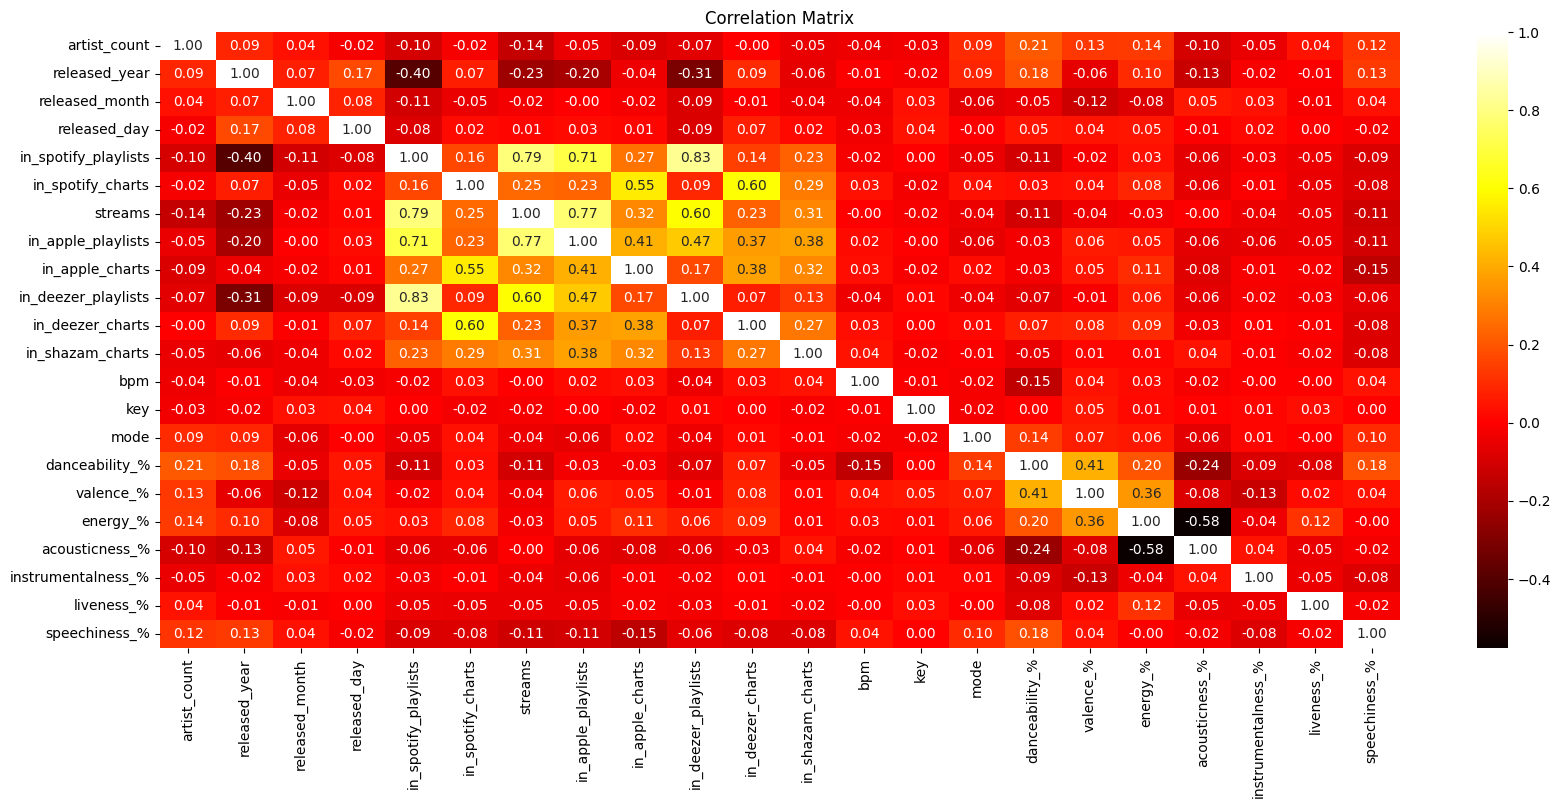

In [103]:
numeric_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Artists In DataSet

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/3803424588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='hot')


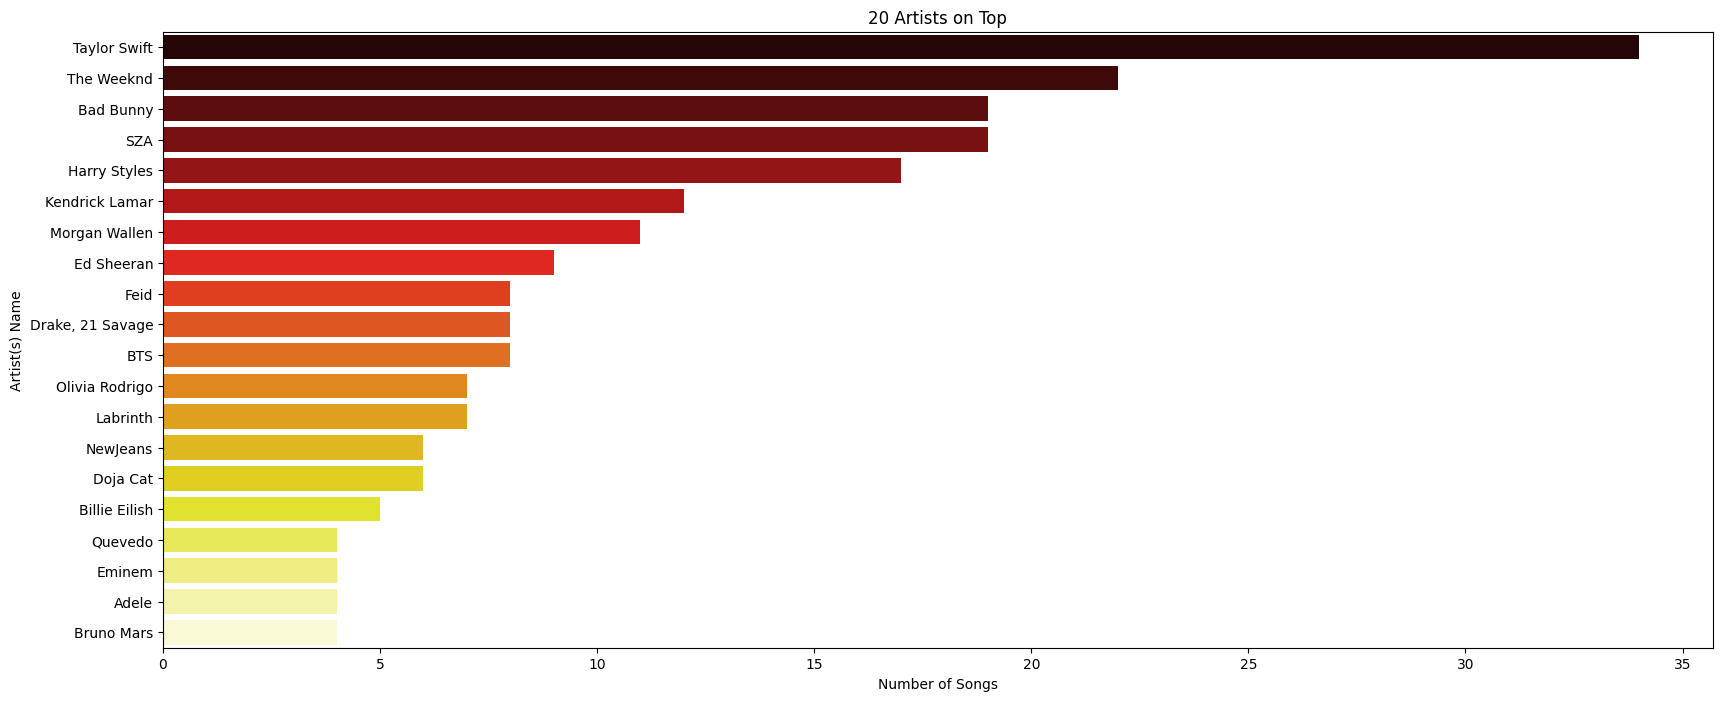

In [104]:
top_artists = cleaned_df['artist(s)_name'].value_counts().head(20)

## plot
plt.figure(figsize=(20, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='hot')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('20 Artists on Top')
plt.show()

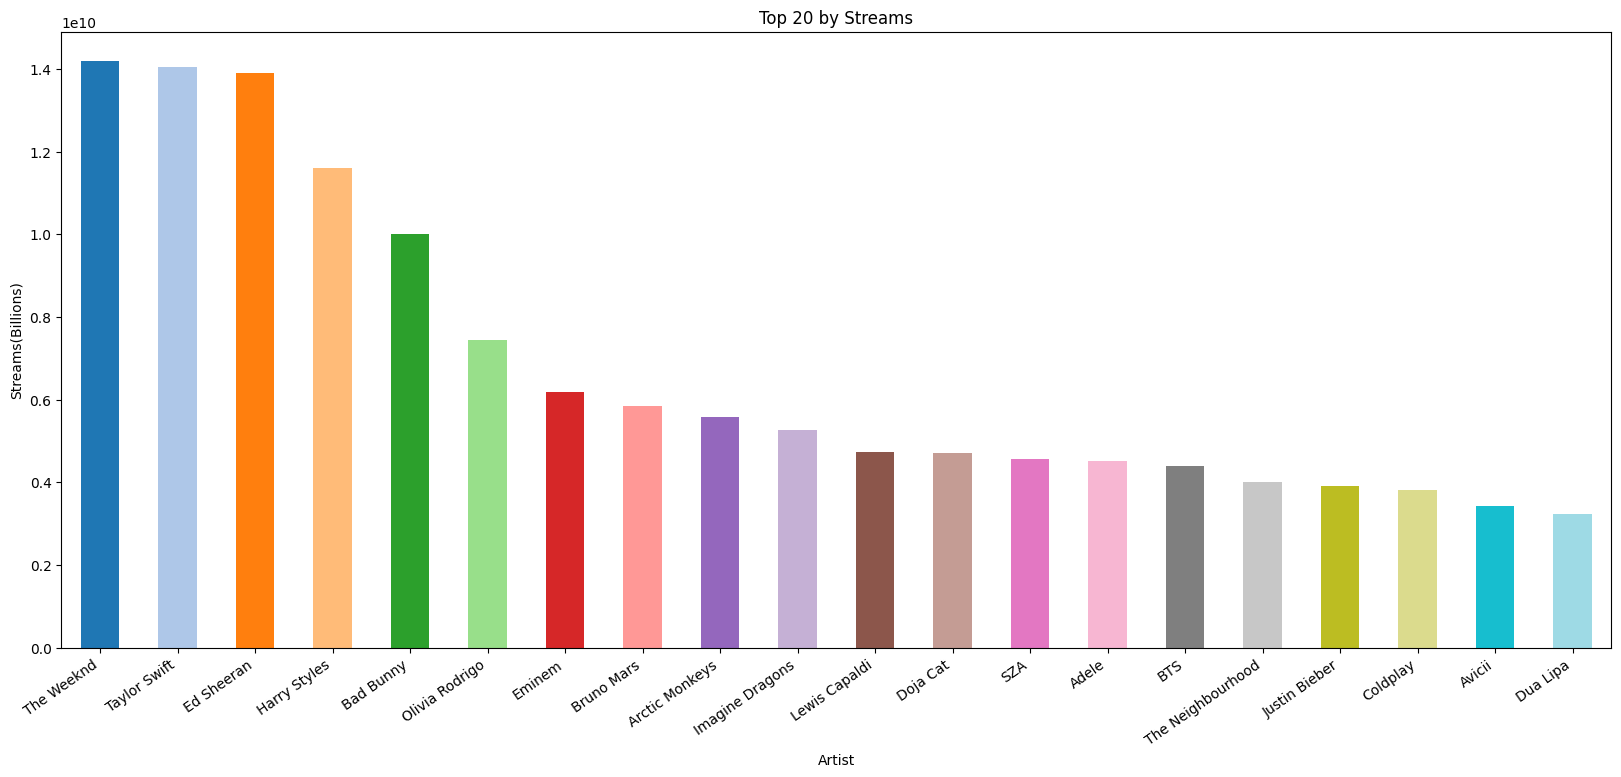

In [105]:

# Group by artist and calculate the total sum of streams
artist_streams = cleaned_df.groupby('artist(s)_name')['streams'].sum()
top_20 = artist_streams.nlargest(20)
colors = sns.color_palette('tab20', len(top_20))
plt.figure(figsize=(20, 8))
top_20.plot(kind='bar', color=colors)
plt.title('Top 20 by Streams')
plt.xlabel('Artist')
plt.ylabel('Streams(Billions)')
plt.xticks(rotation=35, ha='right')
plt.show()

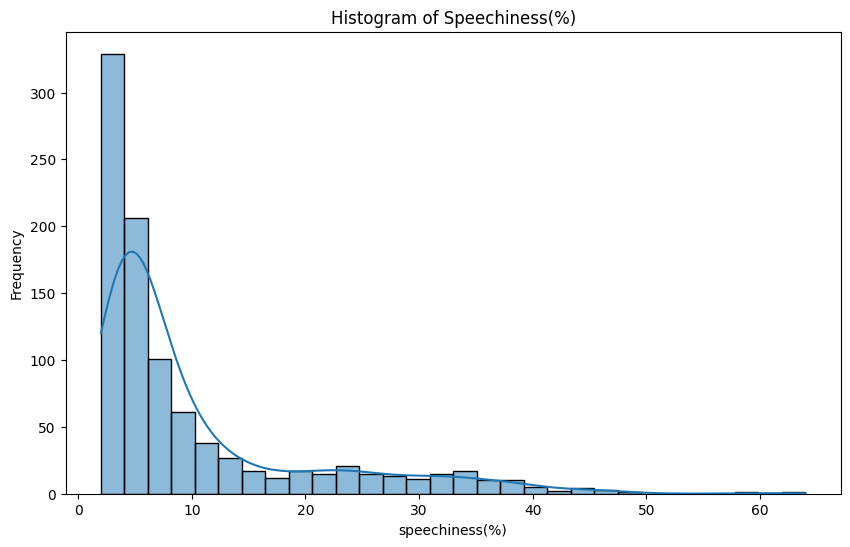

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['speechiness_%'], bins=30, kde=True)
plt.xlabel('speechiness(%)')
plt.ylabel('Frequency')
plt.title('Histogram of Speechiness(%)')
plt.show()

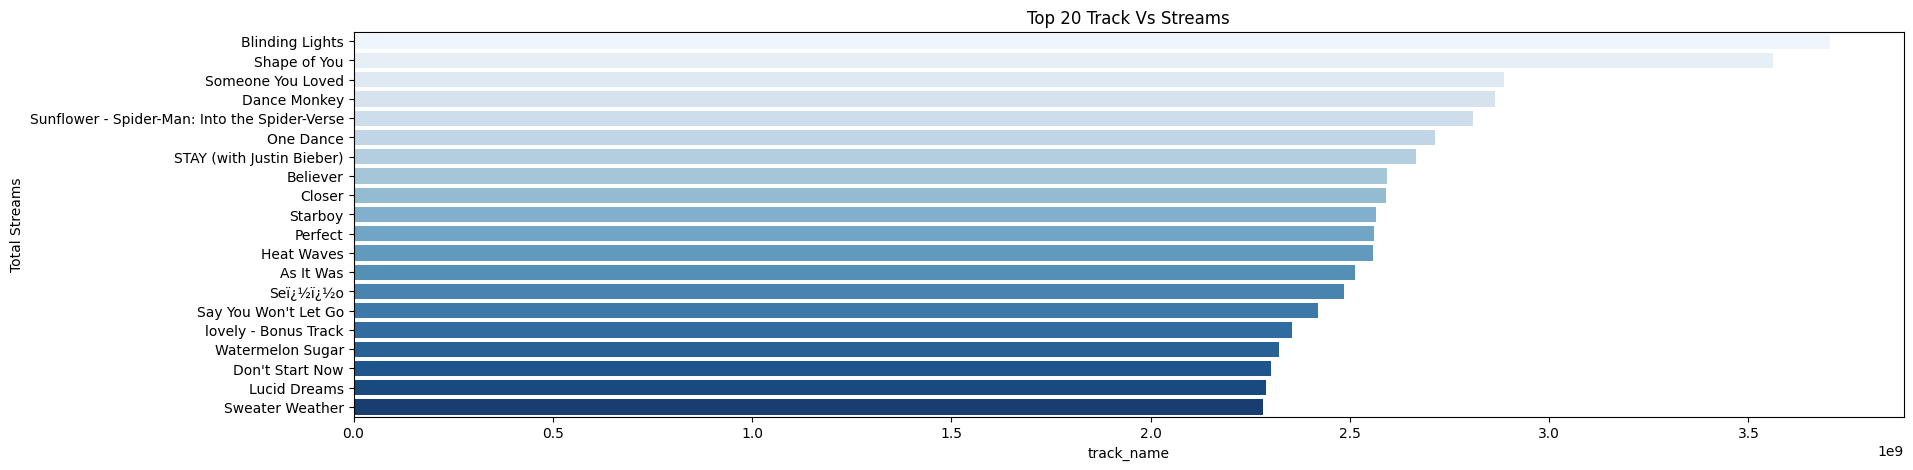

In [107]:

top_spotify_streams = cleaned_df[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(20)

plt.figure(figsize=(20, 5))
sns.barplot(x=top_spotify_streams['streams'], y=top_spotify_streams['track_name'], palette='Blues', hue=top_spotify_streams['track_name'])

plt.xlabel('track_name')
plt.ylabel('Total Streams')
plt.title('Top 20 Track Vs Streams')
plt.show()





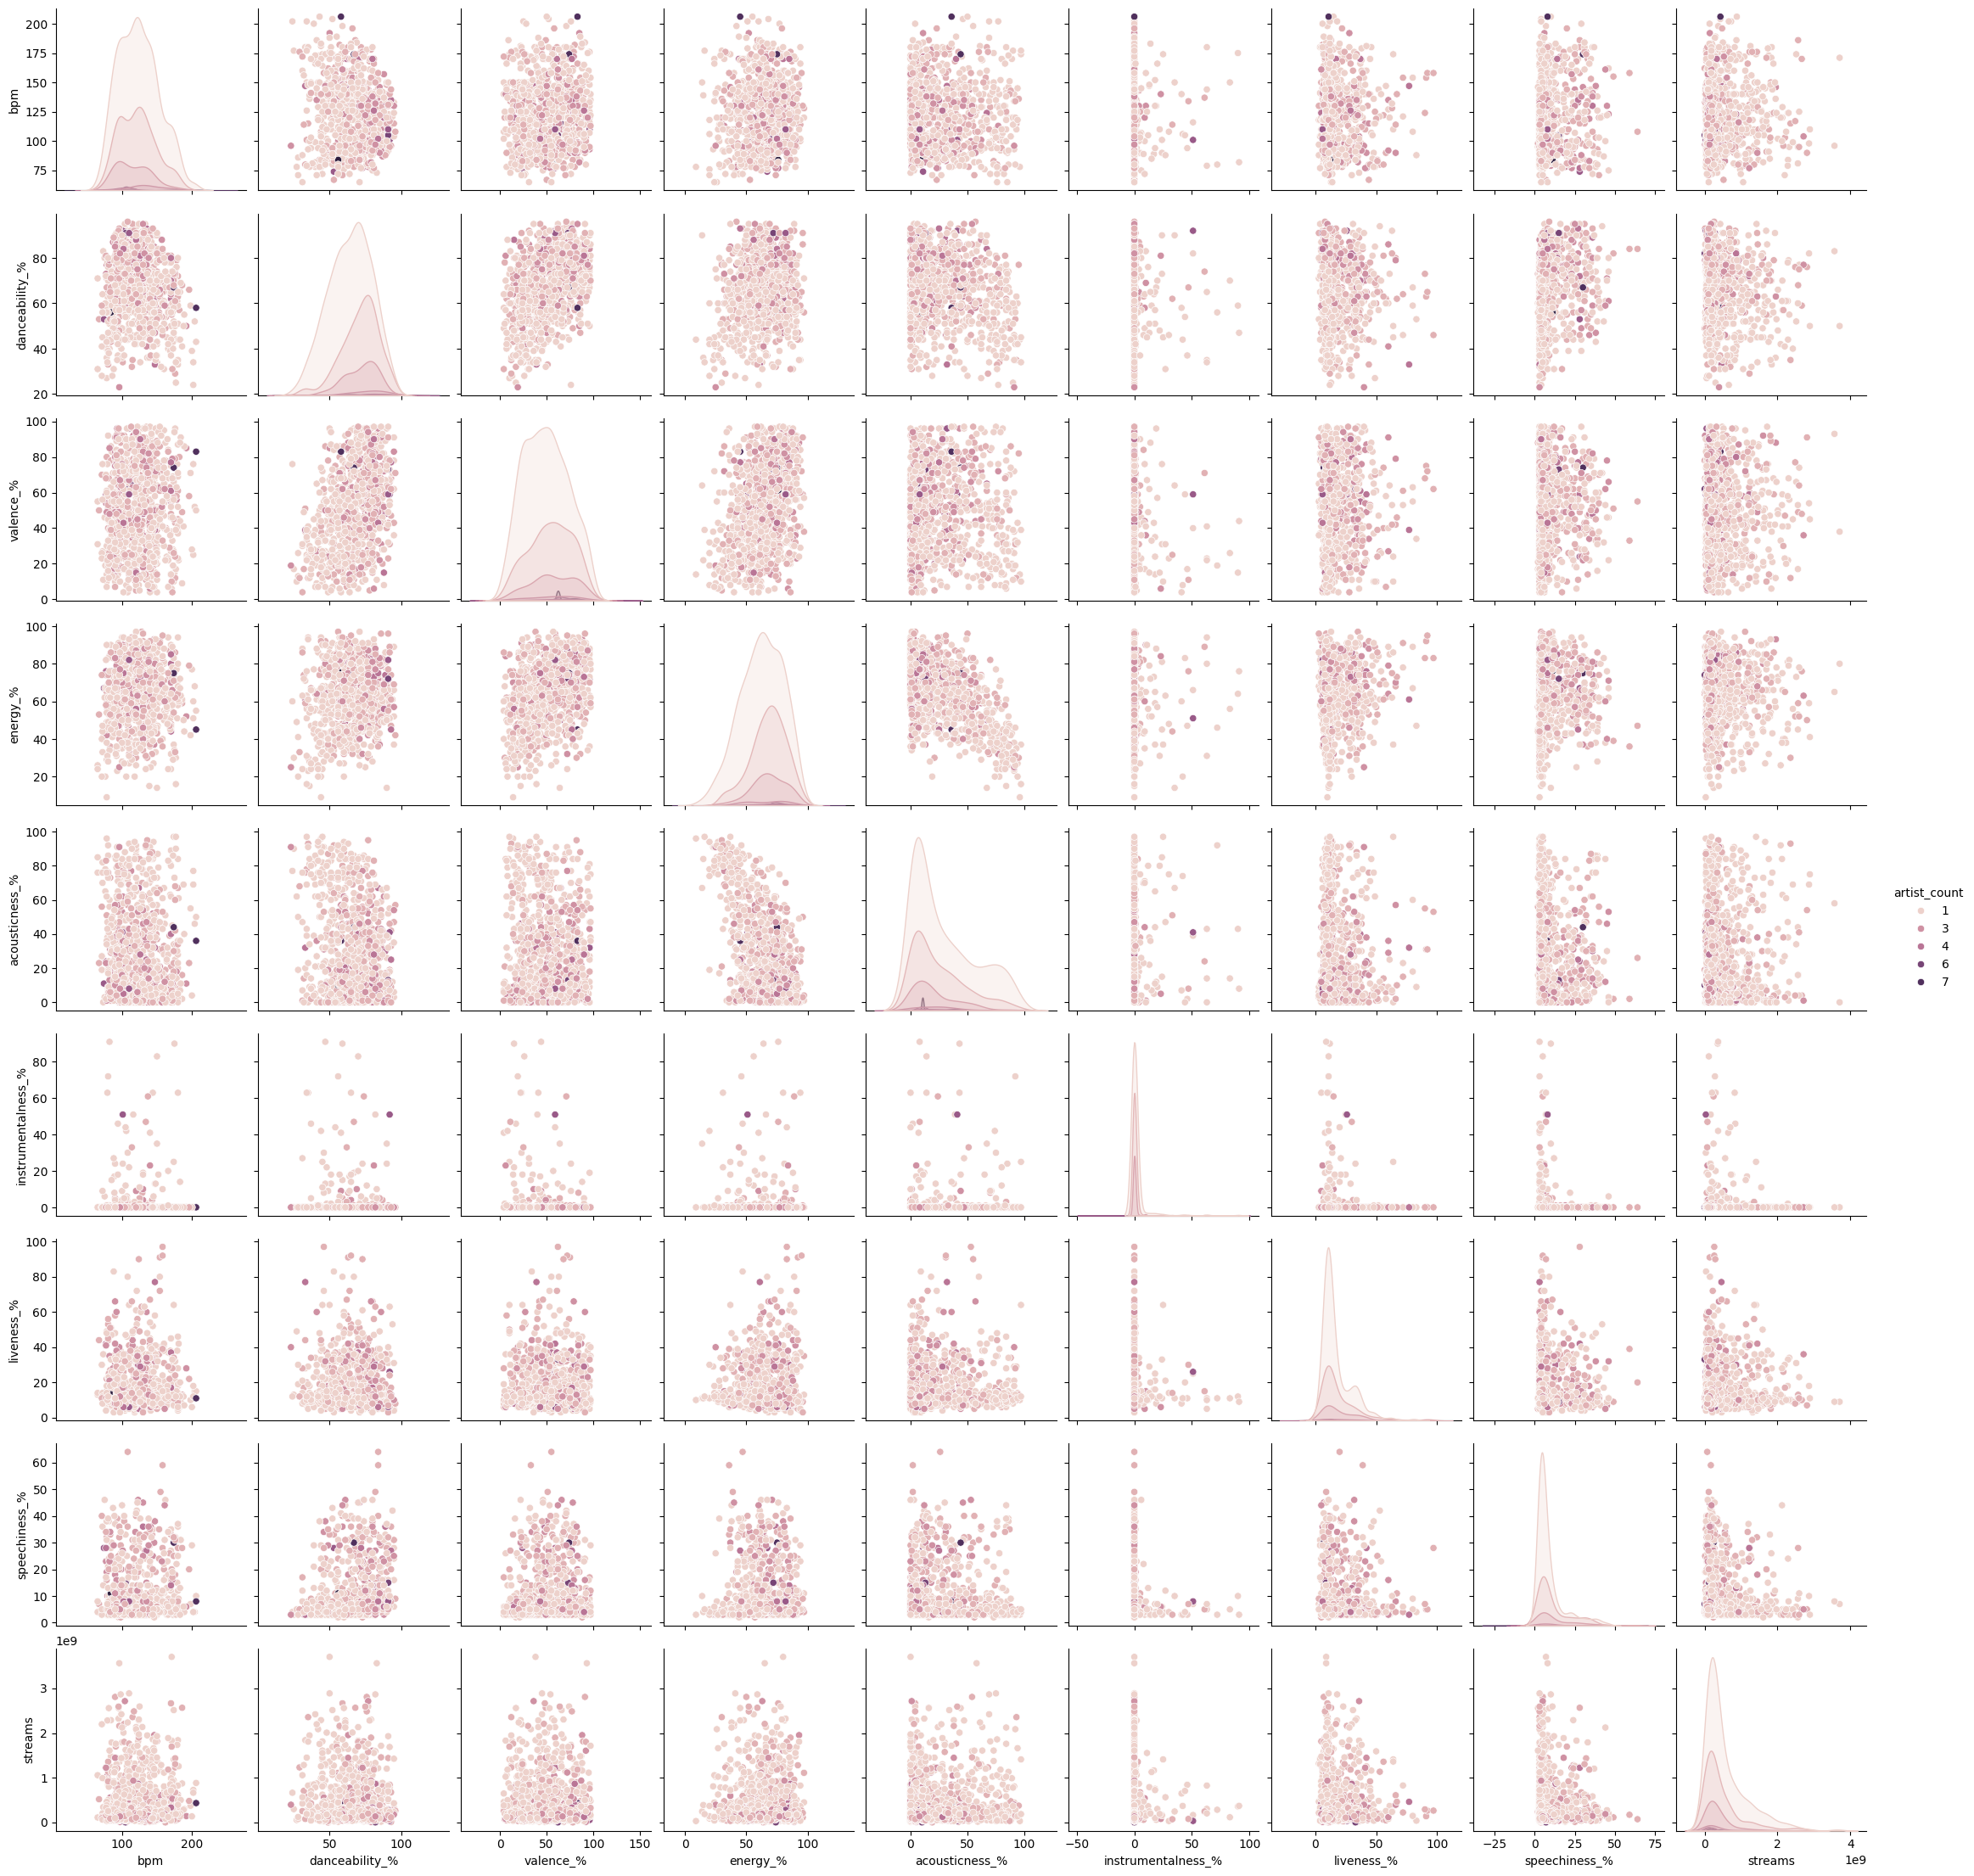

In [108]:
sns.pairplot(cleaned_df, hue='artist_count', vars=['bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%','streams'])

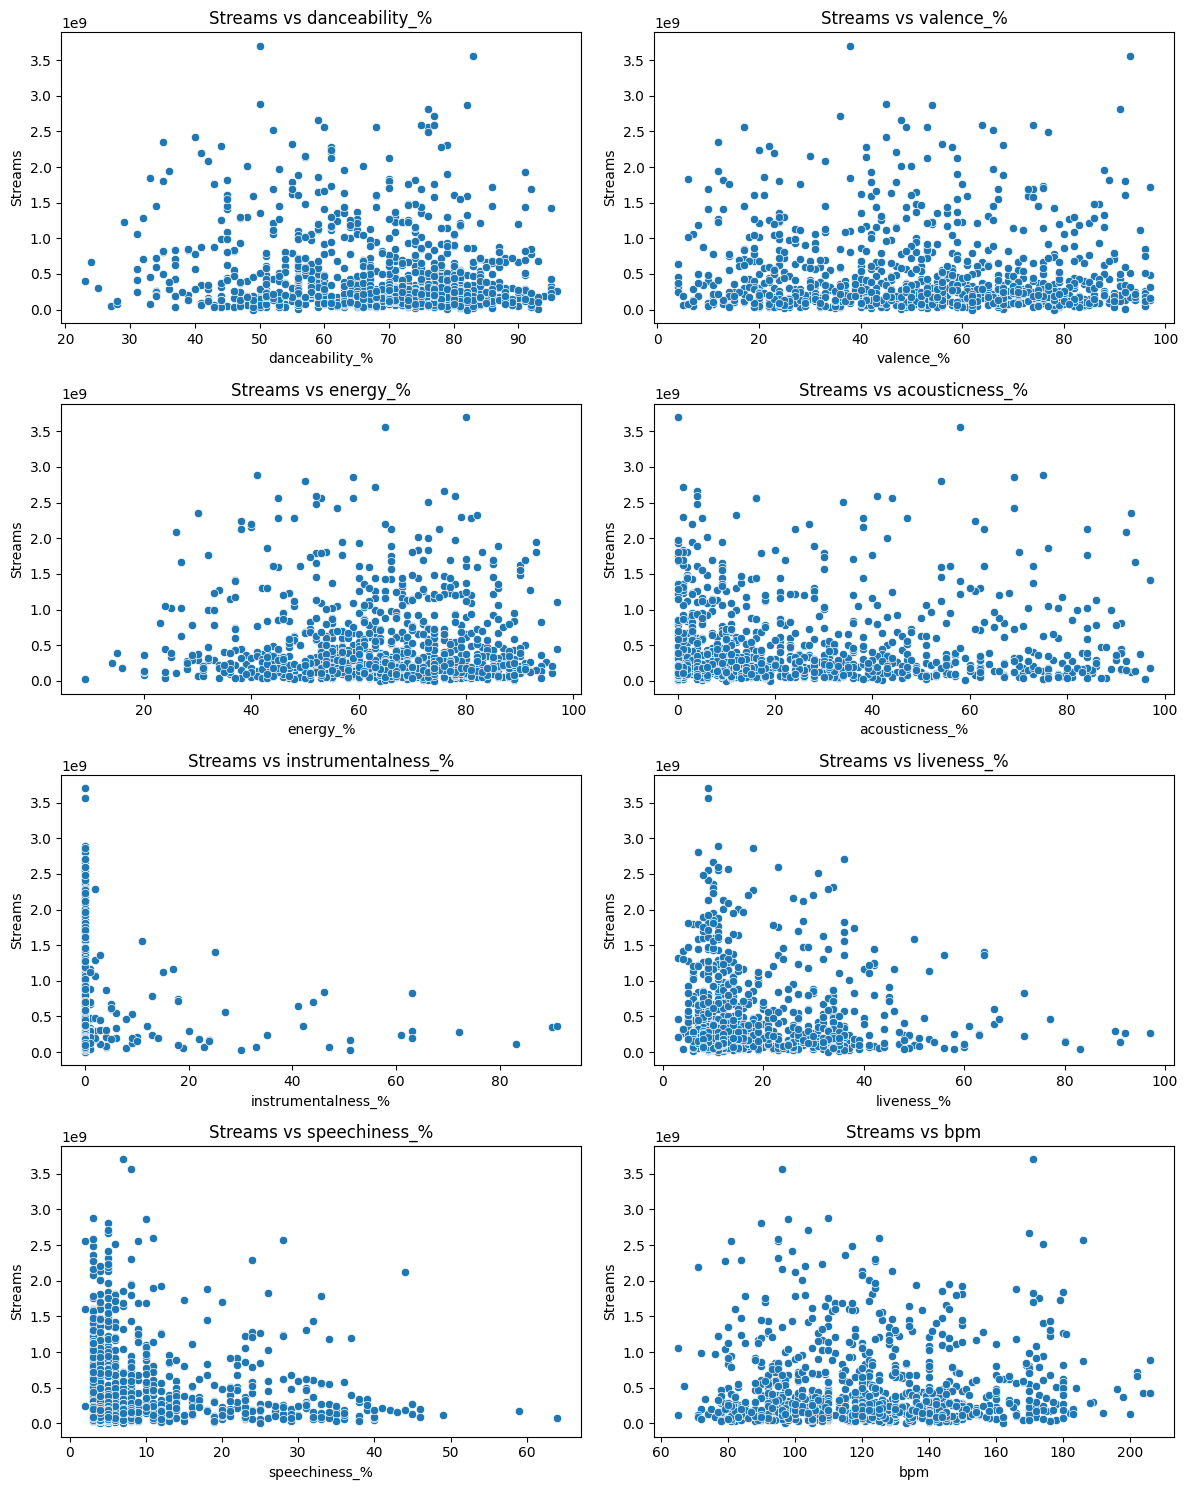

In [109]:
# Define the columns to plot
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
            'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']

# Create subplots for each feature
num_features = len(features)
cols = 2  # Number of columns in the subplot grid
rows = -(-num_features // cols)  # Calculate the number of rows

fig, axes = plt.subplots(rows, cols, figsize=(12, 15))

# Plot each feature against 'streams'
for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    sns.scatterplot(x=feature, y='streams', data=cleaned_df, ax=axes[row, col])
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Streams')
    axes[row, col].set_title(f'Streams vs {feature}')

# Hide empty subplots if the number of features is not a perfect fit
for j in range(num_features, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()

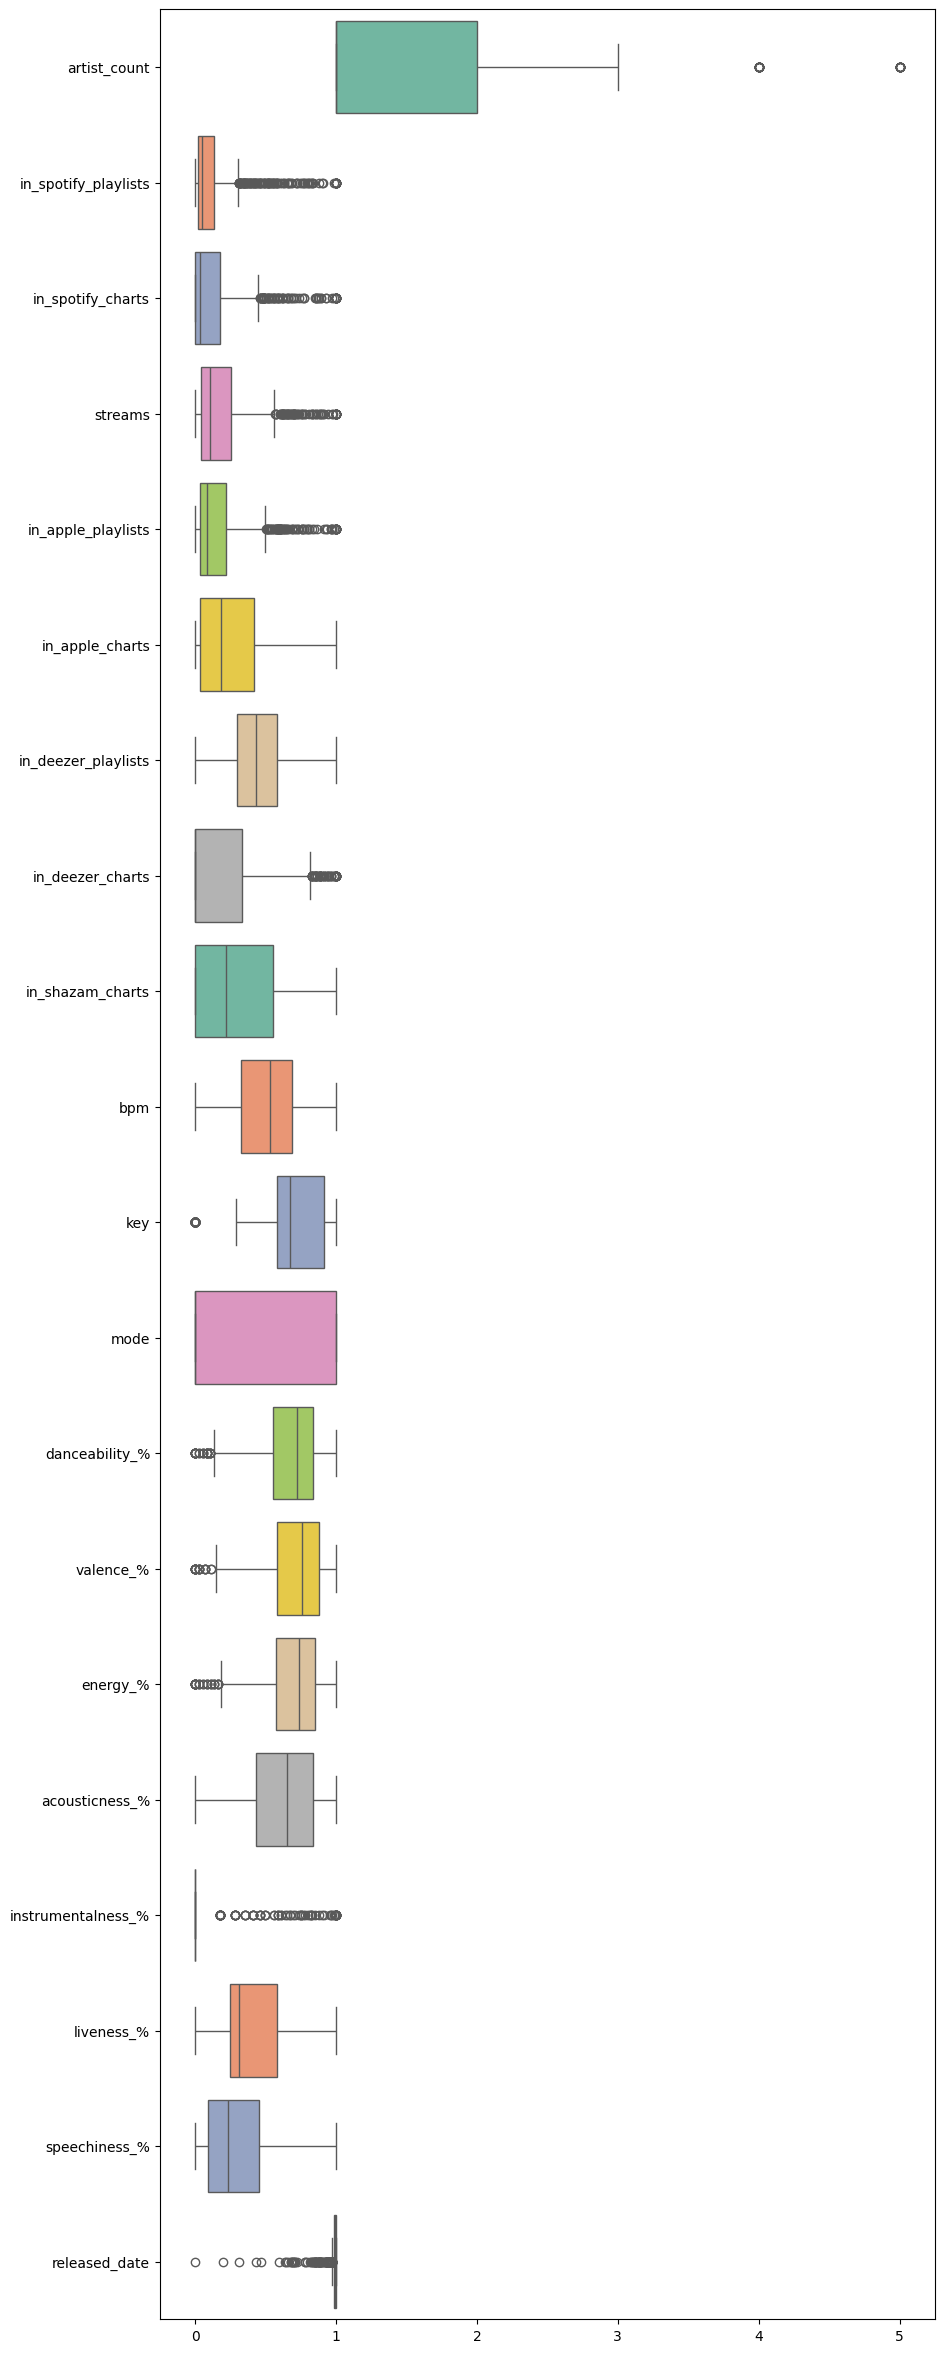

In [140]:



plt.figure(figsize=(10, 30))
ax = sns.boxplot(data=cleaned_df, orient="h", palette="Set2")

## Outliers

In [111]:
# Detecting outliers using the IQR method for all columns
def outliers(cleaned_df):
  outlier_columns = cleaned_df.columns[2:]  # Skipping the first two columns
  outliers = {}

  for column in outlier_columns:
      # Calculating Q1 and Q3
      Q1 = cleaned_df[column].quantile(0.25)
      Q3 = cleaned_df[column].quantile(0.75)
      IQR = Q3 - Q1

      # Determining outliers
      outlier_condition = ((cleaned_df[column] < (Q1 - 1.5 * IQR)) | (cleaned_df[column] > (Q3 + 1.5 * IQR)))
      outliers_count = cleaned_df[outlier_condition].shape[0]


      if outliers_count > 0:
          outliers[column] = outliers_count


  # Display columns with outliers and their counts
  print(outliers)
  for x,y in outliers.items():
    print(x,"   ",  y/953*100)



In [112]:
outliers(cleaned_df)


{'artist_count': 27, 'released_year': 150, 'in_spotify_playlists': 109, 'in_spotify_charts': 78, 'streams': 74, 'in_apple_playlists': 78, 'in_apple_charts': 9, 'in_deezer_playlists': 154, 'in_deezer_charts': 143, 'in_shazam_charts': 163, 'bpm': 5, 'danceability_%': 3, 'energy_%': 4, 'instrumentalness_%': 87, 'liveness_%': 44, 'speechiness_%': 136, 'released_date': 153}
artist_count     2.8331584470094437
released_year     15.739769150052465
in_spotify_playlists     11.437565582371459
in_spotify_charts     8.184679958027283
streams     7.76495278069255
in_apple_playlists     8.184679958027283
in_apple_charts     0.944386149003148
in_deezer_playlists     16.1594963273872
in_deezer_charts     15.005246589716684
in_shazam_charts     17.103882476390346
bpm     0.5246589716684155
danceability_%     0.3147953830010493
energy_%     0.4197271773347324
instrumentalness_%     9.12906610703043
liveness_%     4.616998950682056
speechiness_%     14.270724029380903
released_date     16.05456453305351

In [113]:

# Select numeric columns for outlier capping
numeric_columns = cleaned_df.select_dtypes(include='number').columns

# Function to cap outliers in a column using the 1st and 99th percentiles
def cap_outliers(series):
    lower_bound = series.quantile(0.01)
    upper_bound = series.quantile(0.99)
    return np.where(series < lower_bound, lower_bound, np.where(series > upper_bound, upper_bound, series))

# Capping outliers in the numeric columns
for column in numeric_columns:
    cleaned_df[column] = cap_outliers(cleaned_df[column])

# Display the first few rows after capping
cleaned_df[numeric_columns]


artist_count  released_year  released_month  released_day  \
0             2.0         2023.0             7.0          14.0   
1             1.0         2023.0             3.0          23.0   
2             1.0         2023.0             6.0          30.0   
3             1.0         2019.0             8.0          23.0   
4             1.0         2023.0             5.0          18.0   
..            ...            ...             ...           ...   
948           1.0         2022.0            11.0           3.0   
949           1.0         2022.0            10.0          21.0   
950           2.0         2022.0            11.0           3.0   
951           3.0         2022.0            10.0          20.0   
952           1.0         2022.0            11.0           4.0   

     in_spotify_playlists  in_spotify_charts      streams  in_apple_playlists  \
0                   553.0              89.47  141381703.0                43.0   
1                  1474.0              48.00  133716286.0                48.0   
2                  1397.0              89.47  140003974.0                94.0   
3                  7858.0              89.47  800840817.0               116.0   
4                  3133.0              50.00  303236322.0                84.0   
..                    ...                ...          ...                 ...   
948                 953.0               0.00   91473363.0                61.0   
949                1180.0               0.00  121871870.0                 4.0   
950                 573.0               0.00   73513683.0                 2.0   
951                1320.0               0.00  133895612.0                29.0   
952                 782.0               2.00   96007391.0                27.0   

     in_apple_charts  in_deezer_playlists  ...    bpm  key  mode  \
0              207.0                 45.0  ...  125.0  2.0   0.0   
1              126.0                 58.0  ...   92.0  3.0   0.0   
2              207.0                 91.0  ...  138.0  7.0   0.0   
3              207.0                125.0  ...  170.0  0.0   0.0   
4              133.0                 87.0  ...  144.0  0.0   1.0   
..               ...                  ...  ...    ...  ...   ...   
948             13.0                 37.0  ...  144.0  0.0   0.0   
949              0.0                  8.0  ...  166.0  8.0   0.0   
950              0.0                  7.0  ...   92.0  3.0   0.0   
951             26.0                 17.0  ...   97.0  3.0   0.0   
952             18.0                 32.0  ...   90.0  6.0   1.0   

     danceability_%  valence_%  energy_%  acousticness_%  instrumentalness_%  \
0              80.0       89.0      83.0            31.0                0.00   
1              71.0       61.0      74.0             7.0                0.00   
2              51.0       32.0      53.0            17.0                0.00   
3              55.0       58.0      72.0            11.0                0.00   
4              65.0       23.0      80.0            14.0               48.96   
..              ...        ...       ...             ...                 ...   
948            60.0       24.0      39.0            57.0                0.00   
949            42.0        7.0      24.0            83.0                1.00   
950            80.0       81.0      67.0             4.0                0.00   
951            82.0       67.0      77.0             8.0                0.00   
952            61.0       32.0      67.0            15.0                0.00   

     liveness_%  speechiness_%  
0           8.0            4.0  
1          10.0            4.0  
2          31.0            6.0  
3          11.0           15.0  
4          11.0            6.0  
..          ...            ...  
948         8.0            3.0  
949        12.0            6.0  
950         8.0            6.0  
951        12.0            5.0  
952        11.0            5.0  

[952 rows x 22 columns]

/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/318561158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=cleaned_df[col], orient="h", palette="Set2")
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/318561158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=cleaned_df[col], orient="h", palette="Set2")
/var/folders/nc/pwyjh1ps6ydc38qcgv85zqb40000gn/T/ipykernel_18594/318561158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=cleaned_df[col], orient="h", palette="Set2")
/

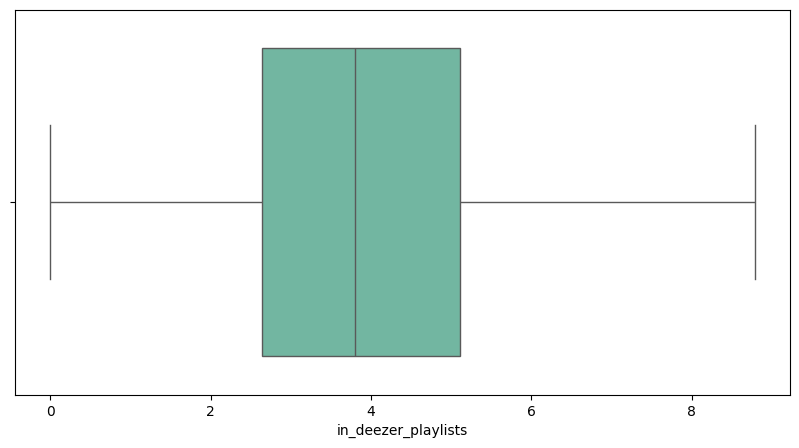

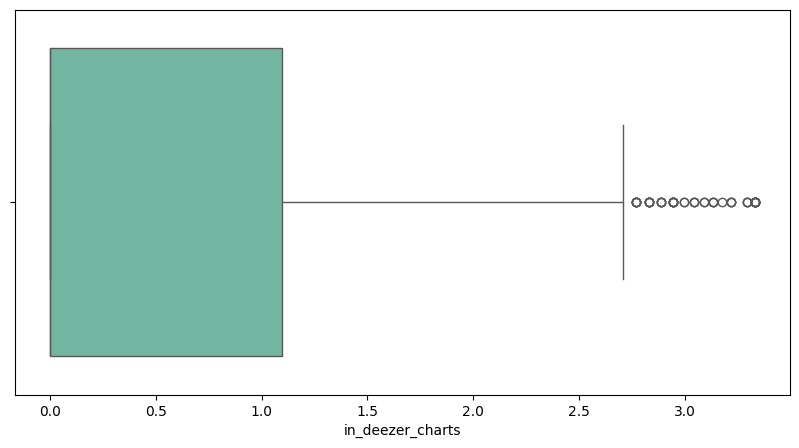

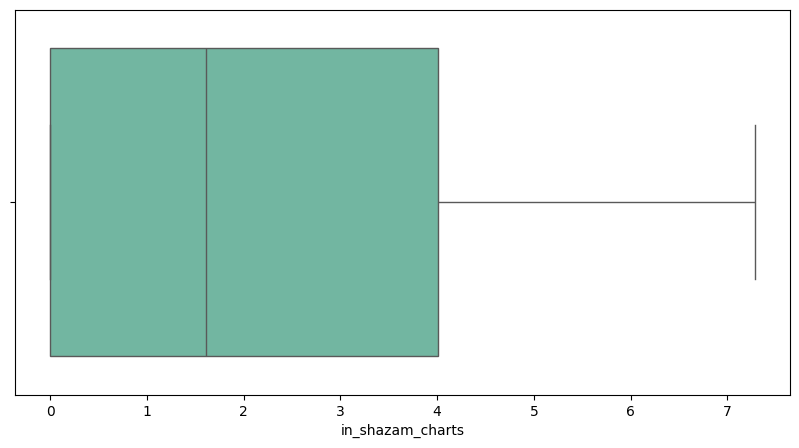

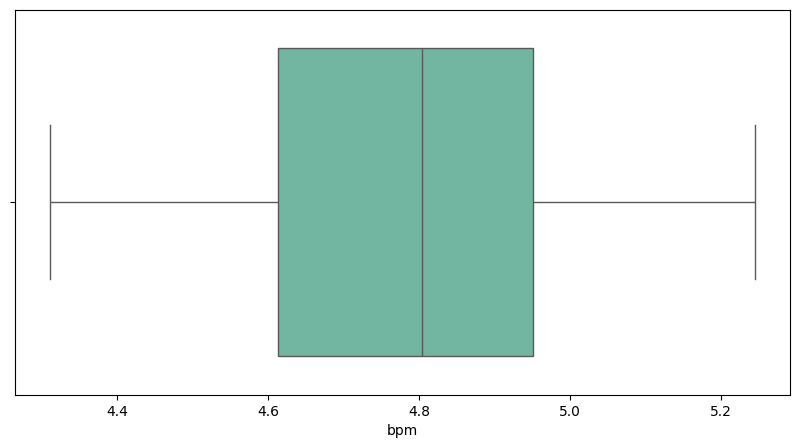

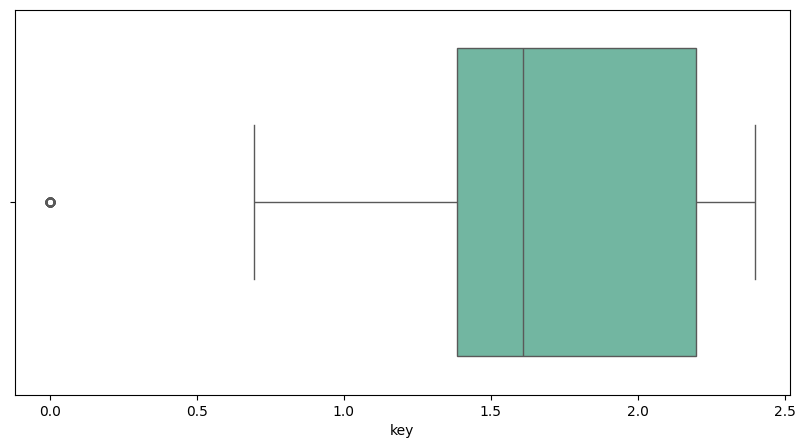

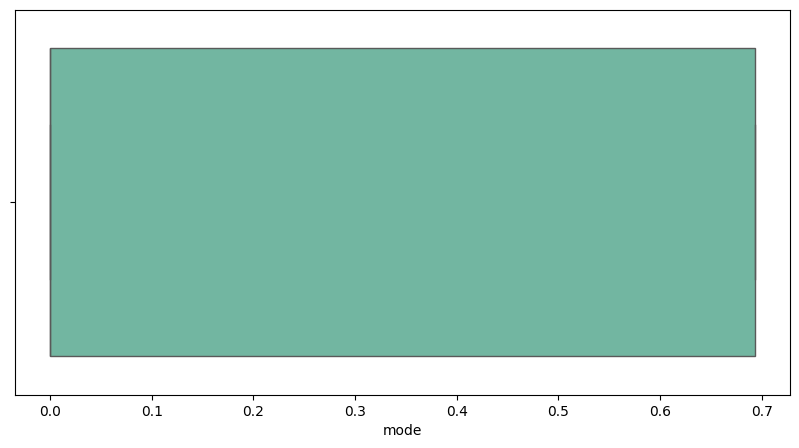

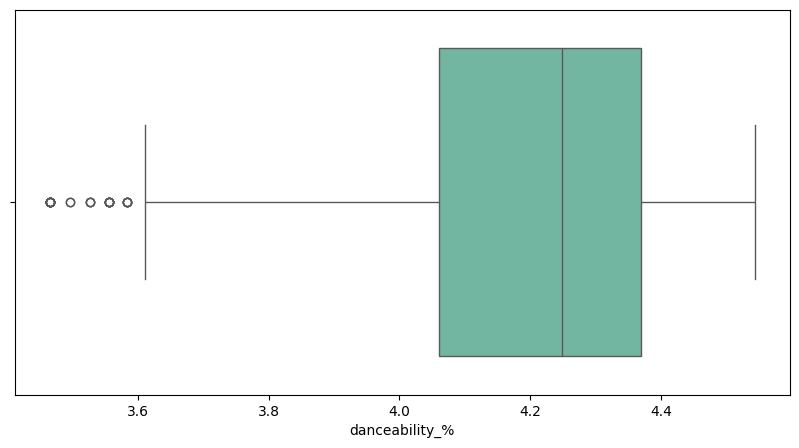

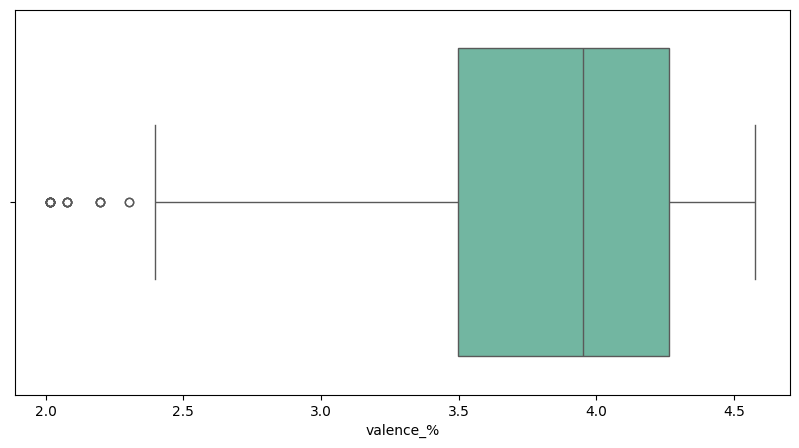

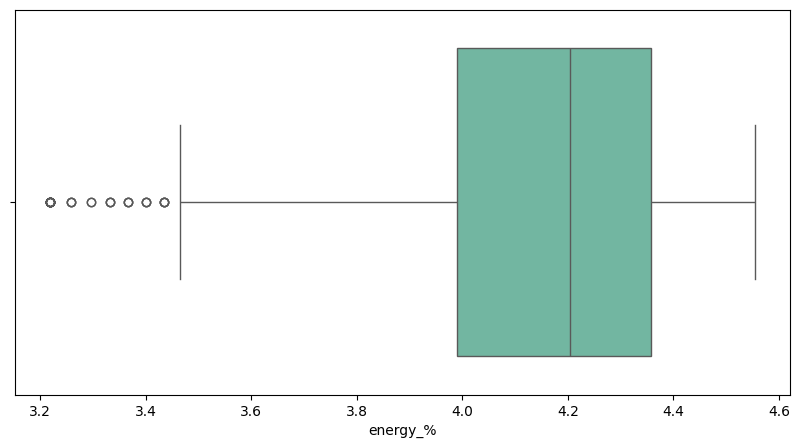

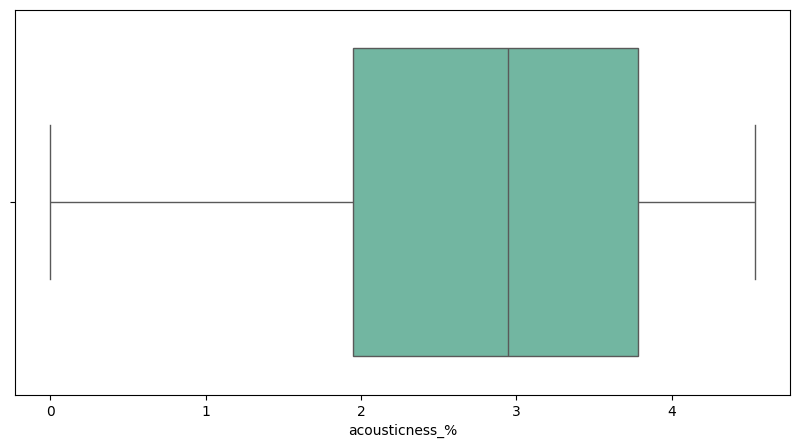

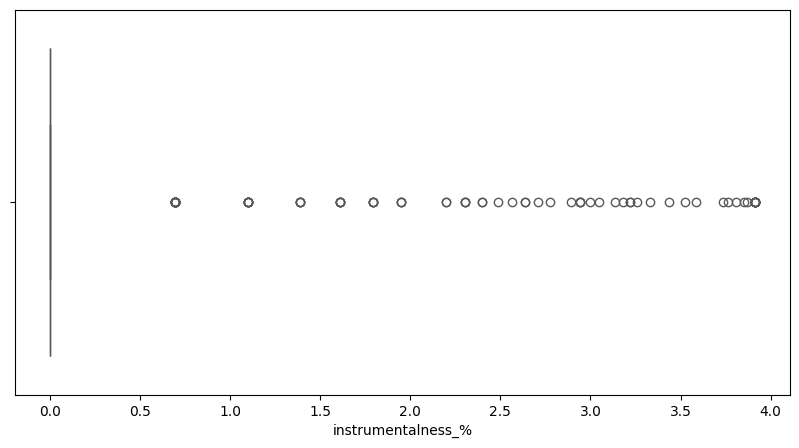

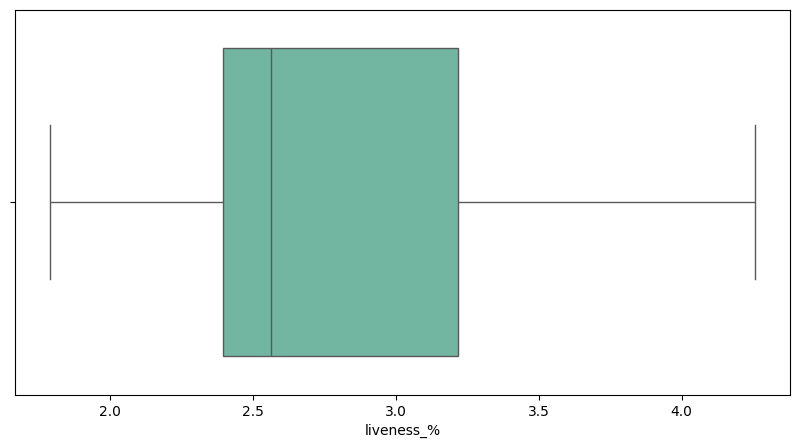

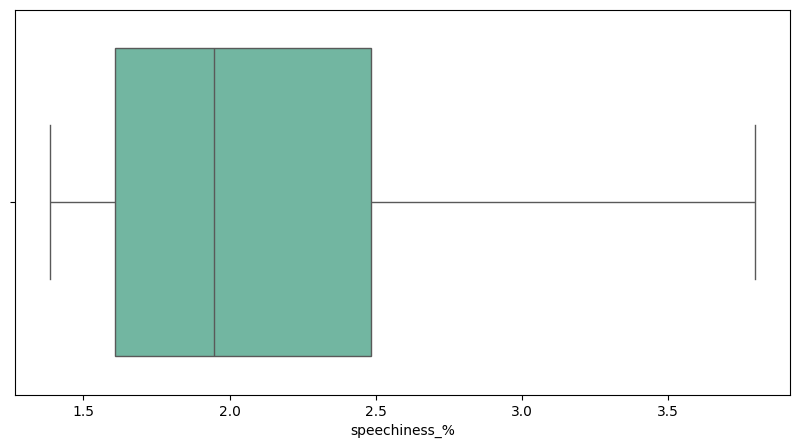

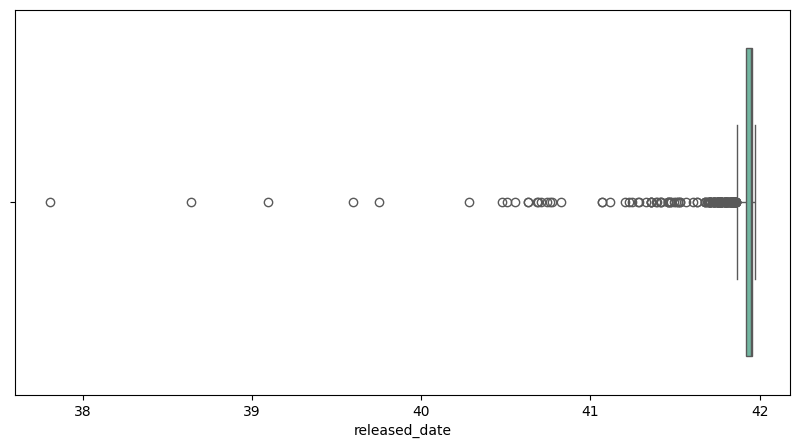

In [114]:
for col in cleaned_df.columns[11:]:
    # Convert the column to numeric, errors='coerce' will replace non-numeric values with NaN
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

    # Now apply np.log1p, NaN values will remain as NaN
    cleaned_df[col] = np.log1p(cleaned_df[col])
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(data=cleaned_df[col], orient="h", palette="Set2")


## Normalizing Data

In [115]:
cleaned_df = cleaned_df.drop(columns=['track_name','released_year','released_month',	'released_day'])
norm_df = cleaned_df
def normalize(df):

  for col in df.columns[2:]:
    min_ = df[col].min()
    max_ = (cleaned_df[col]).max()
    norm_df[col] = [((x - min_ )/(max_-min_)) for x in df[col] ]



In [116]:
normalize(cleaned_df)

In [117]:
norm_df.head()

artist(s)_name  artist_count  in_spotify_playlists  in_spotify_charts  \
0  Latto, Jung Kook           2.0              0.010736           1.000000   
1       Myke Towers           1.0              0.033453           0.536493   
2    Olivia Rodrigo           1.0              0.031553           1.000000   
3      Taylor Swift           1.0              0.190917           1.000000   
4         Bad Bunny           1.0              0.074372           0.558847   

    streams  in_apple_playlists  in_apple_charts  in_deezer_playlists  \
0  0.043813            0.108345         1.000000             0.435857   
1  0.040785            0.120943         0.608696             0.464191   
2  0.043269            0.236847         1.000000             0.514765   
3  0.304260            0.292280         1.000000             0.550568   
4  0.107736            0.211651         0.642512             0.509705   

   in_deezer_charts  in_shazam_charts  ...       key  mode  danceability_%  \
0          0.719767          0.922600  ...  0.458157   0.0        0.861868   
1          0.812865          0.816882  ...  0.578130   0.0        0.752562   
2          0.812865          0.941642  ...  0.867194   0.0        0.450563   
3          0.769911          0.866332  ...  0.000000   0.0        0.519337   
4          0.832237          0.831495  ...  0.000000   1.0        0.671814   

   valence_%  energy_%  acousticness_%  instrumentalness_%  liveness_%  \
0   0.970724  0.907820        0.764624                 0.0    0.164613   
1   0.825061  0.822930        0.458775                 0.0    0.246082   
2   0.578576  0.576860        0.637685                 0.0    0.679610   
3   0.805676  0.802684        0.548230                 0.0    0.281408   
4   0.454106  0.880579        0.597461                 1.0    0.281408   

   speechiness_%  released_date  
0       0.092630       1.000000  
1       0.092630       0.998608  
2       0.232305       0.999828  
3       0.575472       0.981878  
4       0.232305       0.999299  

[5 rows x 21 columns]

Feature Selection

In [118]:




# Calculate Pearson correlation
correlation_matrix = norm_df.iloc[: , 1:-1 ].corr()
print(correlation_matrix)

# Set a threshold
threshold = 0.1

# Selecting highly correlated features
selected_features = correlation_matrix.index[abs(correlation_matrix['streams']) > threshold]
print("Selected Features:", selected_features, len(selected_features) )


                      artist_count  in_spotify_playlists  in_spotify_charts  \
artist_count              1.000000             -0.107403          -0.014163   
in_spotify_playlists     -0.107403              1.000000           0.174015   
in_spotify_charts        -0.014163              0.174015           1.000000   
streams                  -0.140451              0.804824           0.250436   
in_apple_playlists       -0.052142              0.722393           0.237268   
in_apple_charts          -0.092701              0.282584           0.551249   
in_deezer_playlists      -0.097225              0.780701           0.233476   
in_deezer_charts          0.012816              0.178662           0.612687   
in_shazam_charts         -0.077546              0.253740           0.469665   
bpm                      -0.045855             -0.021346           0.034623   
key                      -0.034353              0.026210           0.008904   
mode                      0.093701             -0.04

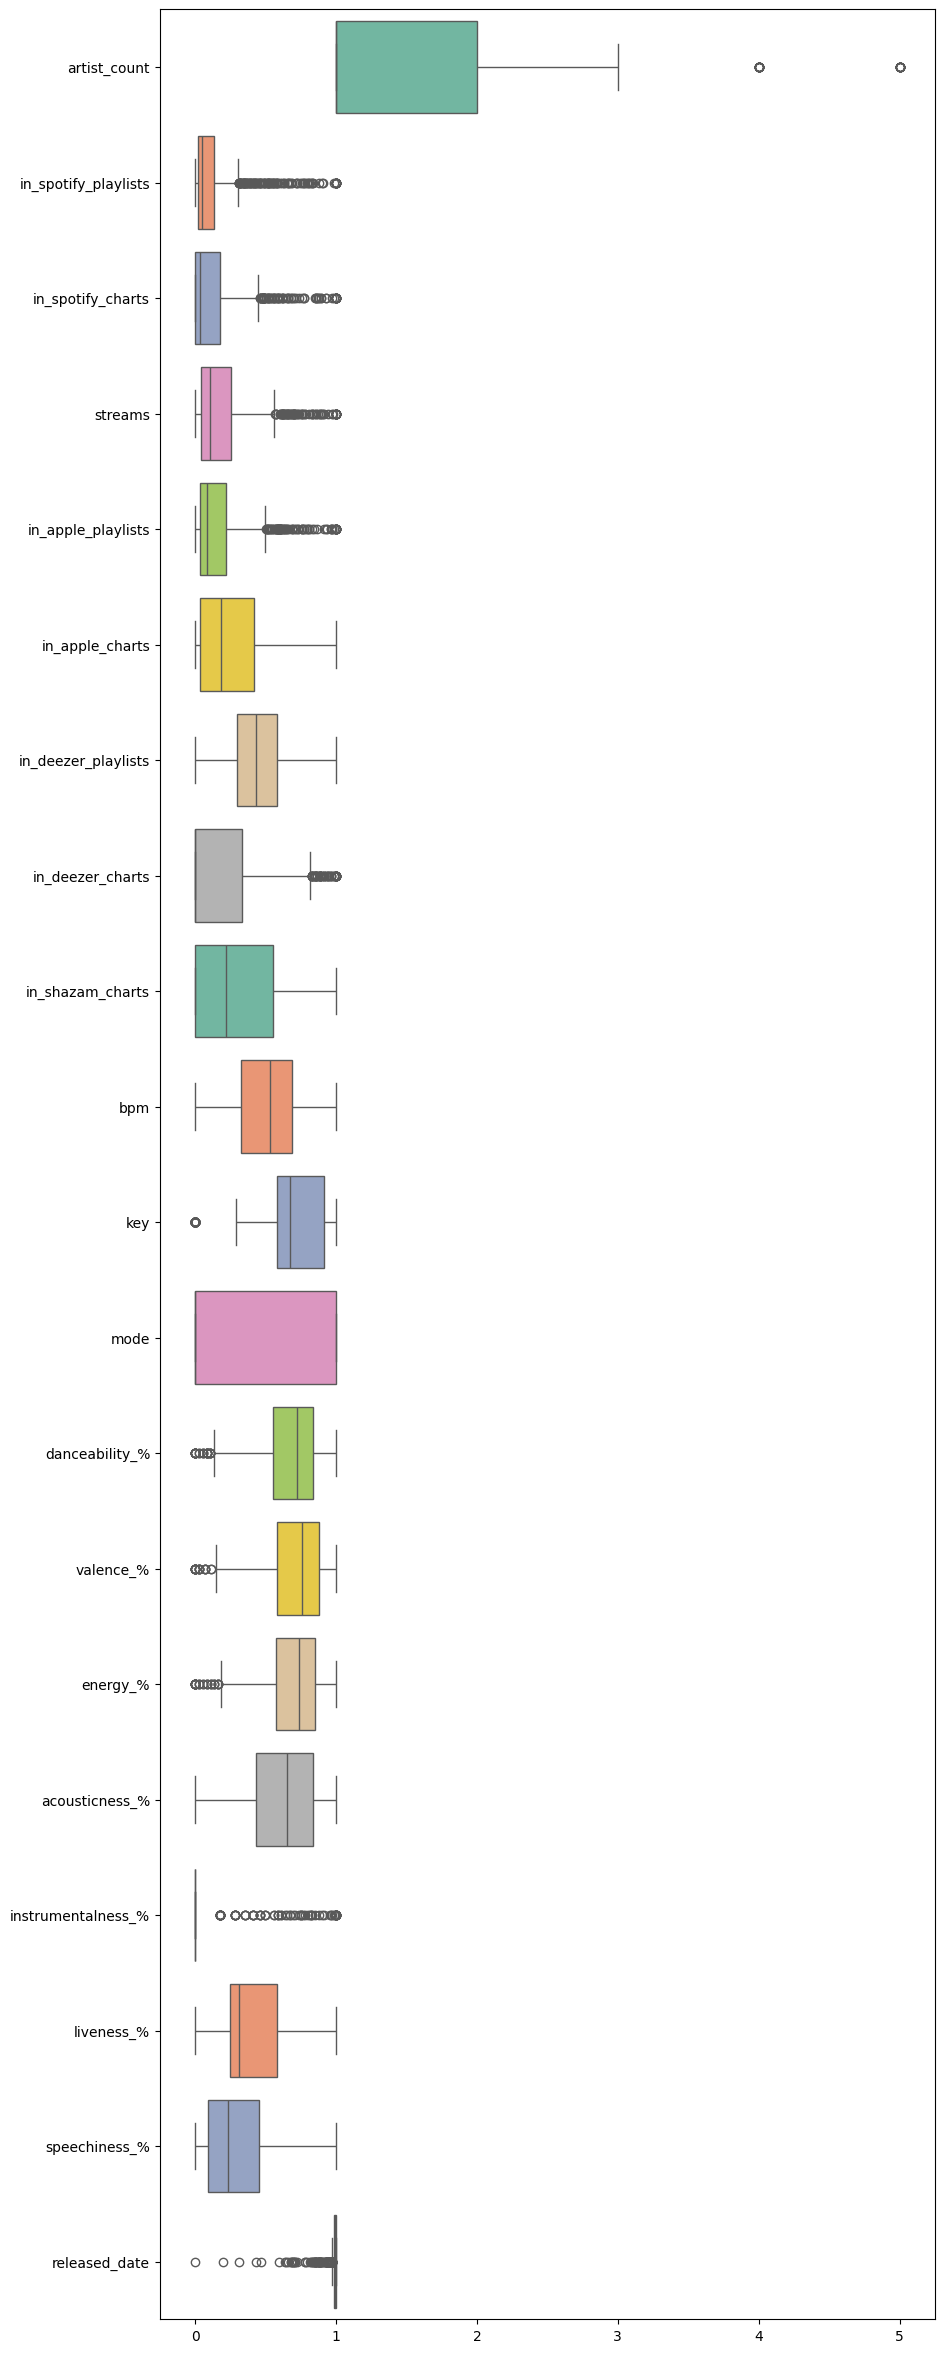

In [119]:
plt.figure(figsize=(10, 30))

ax = sns.boxplot(data=norm_df, orient="h", palette="Set2")

## Splitting Train and Test

In [120]:



X = norm_df[['artist_count', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
    'bpm', 'key', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%','streams', 'speechiness_%','released_date']]

# X =norm_df[selected_features]
X = X[selected_features].fillna(value = X.released_date.mean())
y = norm_df['streams']  # Target variable
X = X.drop("streams", axis = 1)
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=24)

In [121]:
np.isnan(X).sum()

artist_count            0
in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
danceability_%          0
speechiness_%           0
dtype: int64

## Model Prediction

In [122]:
# laz_reg = LazyRegressor(predictions=True)
# models, predictions = laz_reg.fit(X_train, X_test, y_train, y_test)

# # Print the models and their performance metrics
# print(models)

In [130]:


# Elastic Net Regression
class ElasticNetRegression:
    def __init__(self, l1_ratio, alpha, n_iter, learning_rate):
        self.l1_ratio = l1_ratio
        self.alpha = alpha
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.weights = None

    def fit(self, X, y):
        # Adding intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        n_samples, n_features = X_b.shape
        # Xavier/Glorot initialization
        limit = np.sqrt(6 / (n_features + 1))  # +1 for the output layer
        self.weights = np.random.uniform(-limit, limit, (n_features,))

        for _ in range(self.n_iter):
            y_pred = np.dot(X_b, self.weights)
            # Gradient computation
            dW = (-(2 * X_b.T @ (y - y_pred)) +
                  self.alpha * self.l1_ratio * np.sign(self.weights) +
                  2 * self.alpha * (1 - self.l1_ratio) * self.weights) / n_samples
            # Update weights
            self.weights -= self.learning_rate * dW
        

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
        return np.dot(X_b, self.weights)




# Calculate RMSE and R2
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - np.mean(y_true)) ** 2).sum()
    return 1 - (numerator / denominator)



# Initialize ElasticNet model
model = ElasticNetRegression(l1_ratio=0.6, alpha=0.2, n_iter=9000, learning_rate=0.01)  # Adjusted learning rate

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
X_pred = model.predict(X_train)

# Evaluate the model
print("RMSE:", rmse(y_test, y_pred))
print("Train RMSE",  rmse(y_train,X_pred ))
print("R^2:", score(y_test, y_pred))
print("Train R^2:", score(y_train,X_pred))


RMSE: 0.11645903256571927
Train RMSE 0.11130771186798144
R^2: 0.7174487081407355
Train R^2: 0.7405820134768992


 HyperParametr Tuning

In [131]:
# from sklearn.metrics import mean_squared_error

# def hyperparameter_tuning(X_train, y_train, X_val, y_val, l1_ratios, alphas, learning_rates, n_iters):
#     best_rmse = float("inf")
#     best_params = None

#     for l1_ratio in l1_ratios:
#         for alpha in alphas:
#             for learning_rate in learning_rates:
#                 for n_iter in n_iters:
#                     model = ElasticNetRegression(l1_ratio, alpha, n_iter, learning_rate)
#                     model.fit(X_train, y_train)
#                     y_val_pred = model.predict(X_val)
#                     rmse_ = rmse(y_val, y_val_pred)

#                     if rmse_ < best_rmse:
#                         best_rmse = rmse_
#                         best_params = (l1_ratio, alpha, learning_rate, n_iter)

#     return best_params, best_rmse

# # Define hyperparameter ranges
# l1_ratios = [0.1, 0.2,0.5, 1]
# alphas = [0,0.5, 0.1, 1]
# learning_rates = [0.001, 0.01, 0.1,0.12,0.14]
# n_iters = [1000,5000,2000]

# # Assuming you have a validation set: X_val, y_val
# best_params, best_rmse = hyperparameter_tuning(X_train, y_train, X_val, y_val, l1_ratios, alphas, learning_rates, n_iters)

# print("Best Parameters:", best_params)
# print("Best RMSE:", best_rmse)


In [134]:
model = ElasticNetRegression(l1_ratio=0.8, alpha=0.5, n_iter=1000, learning_rate=0.1) # Adjusted learning rate

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
X_pred = model.predict(X_train)

# Evaluate the model
print("RMSE:", rmse(y_test, y_pred))
print("Train RMSE",  rmse(y_train,X_pred ))
print("R^2:", score(y_test, y_pred))
print("Train R^2:", score(y_train,X_pred))


RMSE: 0.11440353065922743
Train RMSE 0.1099444459274312
R^2: 0.727334747571351
Train R^2: 0.7468976579379404


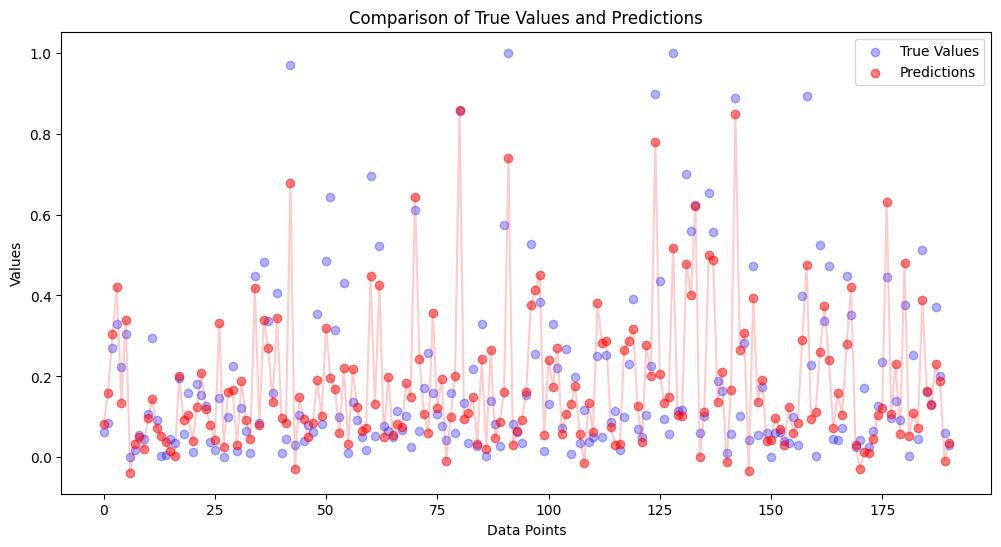

In [139]:

plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.3, label='True Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predictions')

# Line plot
plt.plot(range(len(y_pred)), y_pred, color='red', alpha=0.2)

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of True Values and Predictions')
plt.legend()
plt.show()


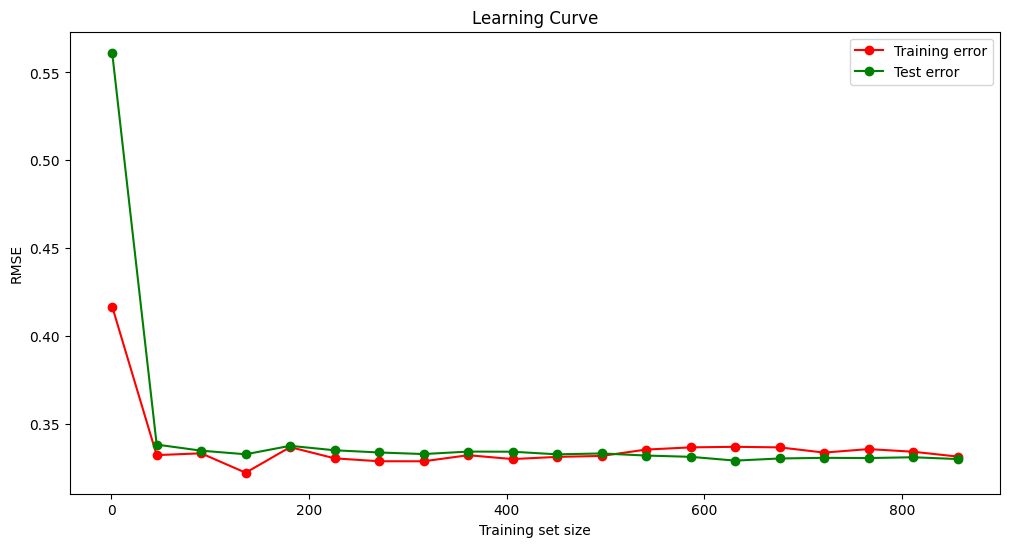

In [135]:


def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    train_sizes = np.linspace(1, len(X_train), 20).astype(int)

    for m in train_sizes:
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(rmse(y_train[:m], y_train_predict))
        test_errors.append(rmse(y_test, y_test_predict))

    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, np.sqrt(train_errors), 'o-', color="r", label="Training error")
    plt.plot(train_sizes, np.sqrt(test_errors), 'o-', color="g", label="Test error")
    plt.title("Learning Curve")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(ElasticNetRegression(l1_ratio=0.8, alpha=0.5, n_iter=1000, learning_rate=0.1),
                    X_train, y_train, X_val, y_val)


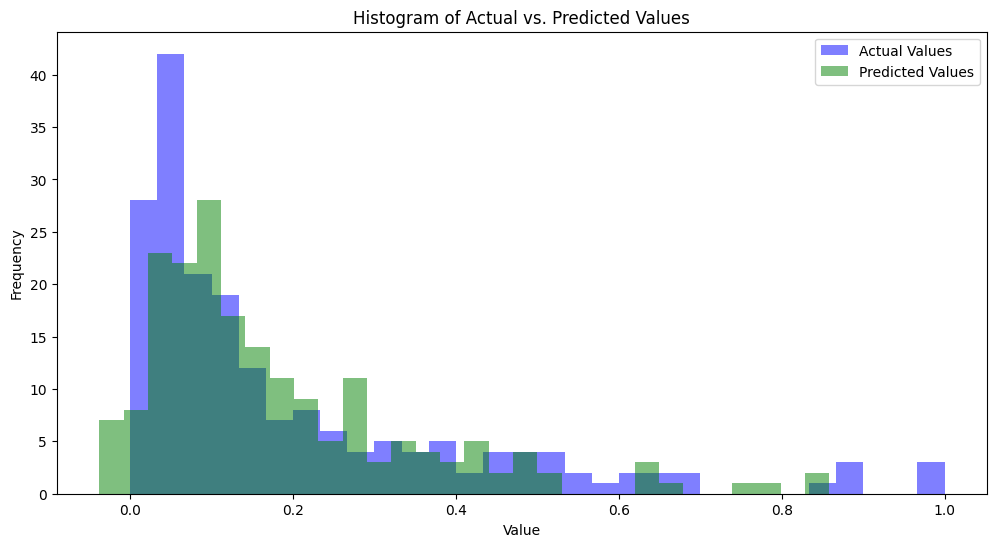

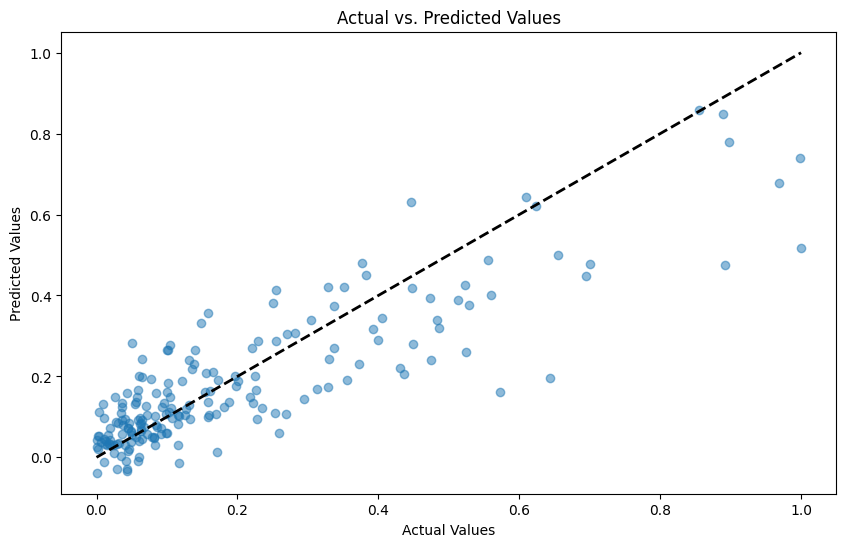

In [136]:
import matplotlib.pyplot as plt

# 1. Histograms of Predictions and Actual Values
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Values', color='blue')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Values', color='green')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs. Predicted Values')
plt.legend()
plt.show()

# 2. Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


